In [11]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

In [3]:
country_scores_pca = pd.read_pickle('../data/country_scores_pca.pkl')

In [12]:
cultural_region_colors = {
    'African-Islamic': '#000000',
    'Confucian': '#56b4e9',
    'Latin America': '#cc79a7',
    'Protestant Europe': '#d55e00',
    'Catholic Europe': '#e69f00',
    'English-Speaking': '#009e73',
    'Orthodox Europe': '#0072b2',
    'West & South Asia': '#f0e442',
}

In [32]:
data = country_scores_pca.dropna()[["PC1_rescaled", "PC2_rescaled", "Cultural Region"]]
data

,PC1_rescaled,PC2_rescaled,Cultural Region
0,-0.892988,0.569878,Orthodox Europe
1,-1.438672,0.208161,African-Islamic
2,3.454350,-0.343267,Catholic Europe
3,-1.743798,0.110470,Orthodox Europe
4,0.543768,-0.357230,Latin America
...,...,...,...
105,1.112757,-0.688963,Latin America
106,-1.413217,-1.298871,West & South Asia
107,-0.946381,-0.538492,Latin America
108,-2.208811,-0.076226,African-Islamic


In [33]:
data['label'] = pd.Categorical(data['Cultural Region']).codes
data

,PC1_rescaled,PC2_rescaled,Cultural Region,label
0,-0.892988,0.569878,Orthodox Europe,5
1,-1.438672,0.208161,African-Islamic,0
2,3.454350,-0.343267,Catholic Europe,1
3,-1.743798,0.110470,Orthodox Europe,5
4,0.543768,-0.357230,Latin America,4
...,...,...,...,...
105,1.112757,-0.688963,Latin America,4
106,-1.413217,-1.298871,West & South Asia,7
107,-0.946381,-0.538492,Latin America,4
108,-2.208811,-0.076226,African-Islamic,0


In [34]:
# Get unique (label,  Cultural Region) pairs
tups = data[['label', 'Cultural Region']].drop_duplicates()
# sort by label
tups = tups.sort_values(by='label')
# Join cultural_region_colors with tups
tups['color'] = tups['Cultural Region'].map(cultural_region_colors)
tups.reset_index(drop=True, inplace=True)
tups

,label,Cultural Region,color
0,0,African-Islamic,#000000
1,1,Catholic Europe,#e69f00
2,2,Confucian,#56b4e9
3,3,English-Speaking,#009e73
4,4,Latin America,#cc79a7
5,5,Orthodox Europe,#0072b2
6,6,Protestant Europe,#d55e00
7,7,West & South Asia,#f0e442


In [36]:
x = data['PC1_rescaled']
y = data['PC2_rescaled']
labels = np.array(data['label']).astype(int) 

In [37]:
train_data = np.column_stack((x, y)).astype(float)

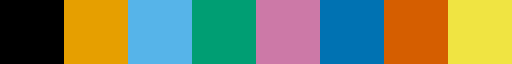

In [38]:
cmap = mcolors.ListedColormap(tups['color'].values)
cmap

In [17]:
data

array([[-0.89298796,  0.56987845],
       [-1.43867152,  0.20816129],
       [ 3.45435041, -0.34326747],
       [-1.74379826,  0.11046967],
       [ 0.54376767, -0.35722954],
       [ 3.20873482, -1.14439392],
       [ 2.55829405, -0.1699634 ],
       [-2.06493285, -0.61329091],
       [-1.59488913,  0.12935765],
       [ 2.60313884, -0.46602632],
       [-1.34142775, -0.53250228],
       [-0.3008104 ,  0.74942647],
       [-0.16708749, -0.04442691],
       [ 0.39180999,  1.38563942],
       [-1.96517875, -0.16747094],
       [ 0.18215226,  0.79947597],
       [ 3.20931379, -0.82018156],
       [ 0.13478591, -0.01844789],
       [ 0.60428574,  0.725226  ],
       [ 0.94176078,  1.347202  ],
       [-1.21385453, -1.34818043],
       [ 0.75905511,  0.32283667],
       [-0.40792967,  0.02820079],
       [ 2.57753354,  0.73340948],
       [ 4.74299076, -0.81762627],
       [-1.54706174, -1.27307896],
       [-1.68145847, -0.12346058],
       [ 1.29888868,  1.07174933],
       [ 3.322874  ,

In [18]:
labels

array([5, 0, 1, 5, 4, 3, 1, 7, 5, 1, 4, 5, 4, 5, 7, 5, 3, 4, 2, 2, 4, 1,
       1, 1, 6, 4, 0, 5, 6, 1, 5, 0, 6, 0, 5, 4, 4, 2, 1, 6, 7, 7, 7, 0,
       1, 1, 2, 5, 0, 0, 2, 0, 7, 0, 5, 0, 5, 1, 2, 7, 7, 0, 1, 4, 2, 5,
       5, 0, 6, 3, 4, 0, 6, 7, 4, 7, 1, 1, 4, 0, 5, 5, 0, 5, 2, 1, 2, 1,
       3, 0, 1, 6, 6, 7, 2, 4, 0, 7, 5, 5, 0, 3, 3, 0, 4, 7, 4, 0, 0])

In [ ]:
def label_map(label):
    return cultural_region_map[label]